# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Lab Workbook No 7: Spatial Microsimulation - Simple World
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - Iteration 2024

> **GOOD ACADEMIC PRACTICE**: As always, The University policy on Good Academic Practice applies. There are probably many ways to address the challenges in here or part of them. You are free to do research and find relevant resources, like the documentation website, if you cited them correctly. But I strongly advise not to use AI tools, most importantly because you won't learn/practice as you are supposed to.
>
>  If you are not aware of **our academic misconduct policy**, kindly take a quick look (Pag 8. https://www.st-ndrews.ac.uk/policy/academic-policies-assessment-examination-and-award-good-academic-practice/good-academic-practice-guidance-for-students-frequently-asked-questions.pdf)


Let's start by describing that you don't need a spatial microsimulation to generate synthetic data for any kind of model or analysis. You can easily simulate data by using multiple techniques. Probably the most common one is to generate random values with some constraints to create new tables as dictionaries and then populate your data frame with such data.

In [1]:
import pandas as pd
import numpy as np

# Define number of individuals
num_individuals = 1000

# Generate synthetic data using a random function.
ages = np.random.randint(2, 90, size=num_individuals)
sex = np.random.choice(['m', 'f'], size=num_individuals)
income = np.random.randint(1000, 10000, size=num_individuals)

# Create DataFrame
synthetic_data = pd.DataFrame({'age': ages, 'sex': sex, 'income': income})
synthetic_data.head()

,age,sex,income
0,70,f,4369
1,71,f,8451
2,73,f,9529
3,40,m,5745
4,55,m,1181


The problem with the previous example is that the data you generate are not linked to a "real" population distribution. You could use the census data as a constraint for some of your tables, but again, there is no spatial relationship between what you could generate and a fair population distribution of the area you would like to mimic or represent. 

This is when spatial microsimulation can help. Initially, you need to establish a reliable connection between non-spatial fine-granular data (survey) and aggregate values typically from the census. What you would like to define is a method that helps you simulate the population characteristics exhibited in your survey attributes but included at an indivisible level and constrained to the aggregated level of the census, which is the most representative sample of your population.  

In this work created by the Urban Analytics programme from the Alan Turing Institute - [The Synthetic Population Catalyst](https://journals.sagepub.com/doi/10.1177/2399808323120306) researchers have created a tool that mimics the social-demographics characteristics of Great Britain for multiple years. The outputs also include the social interaction those synthetic individuals have at MSOA (census boundary) level. The idea behid this tool is to makes it easier for researchers to work with synthetic population data and provide what is common in the population models as initialization phase where the syntetic individual are requiered. SPC combines a variety of data sources and outputs a single file in an encoded format, describing the population and its activities in a given study area. The data include socio-demographic, health, salary and daily activity data per person, and information about the venues where people conduct those activities.

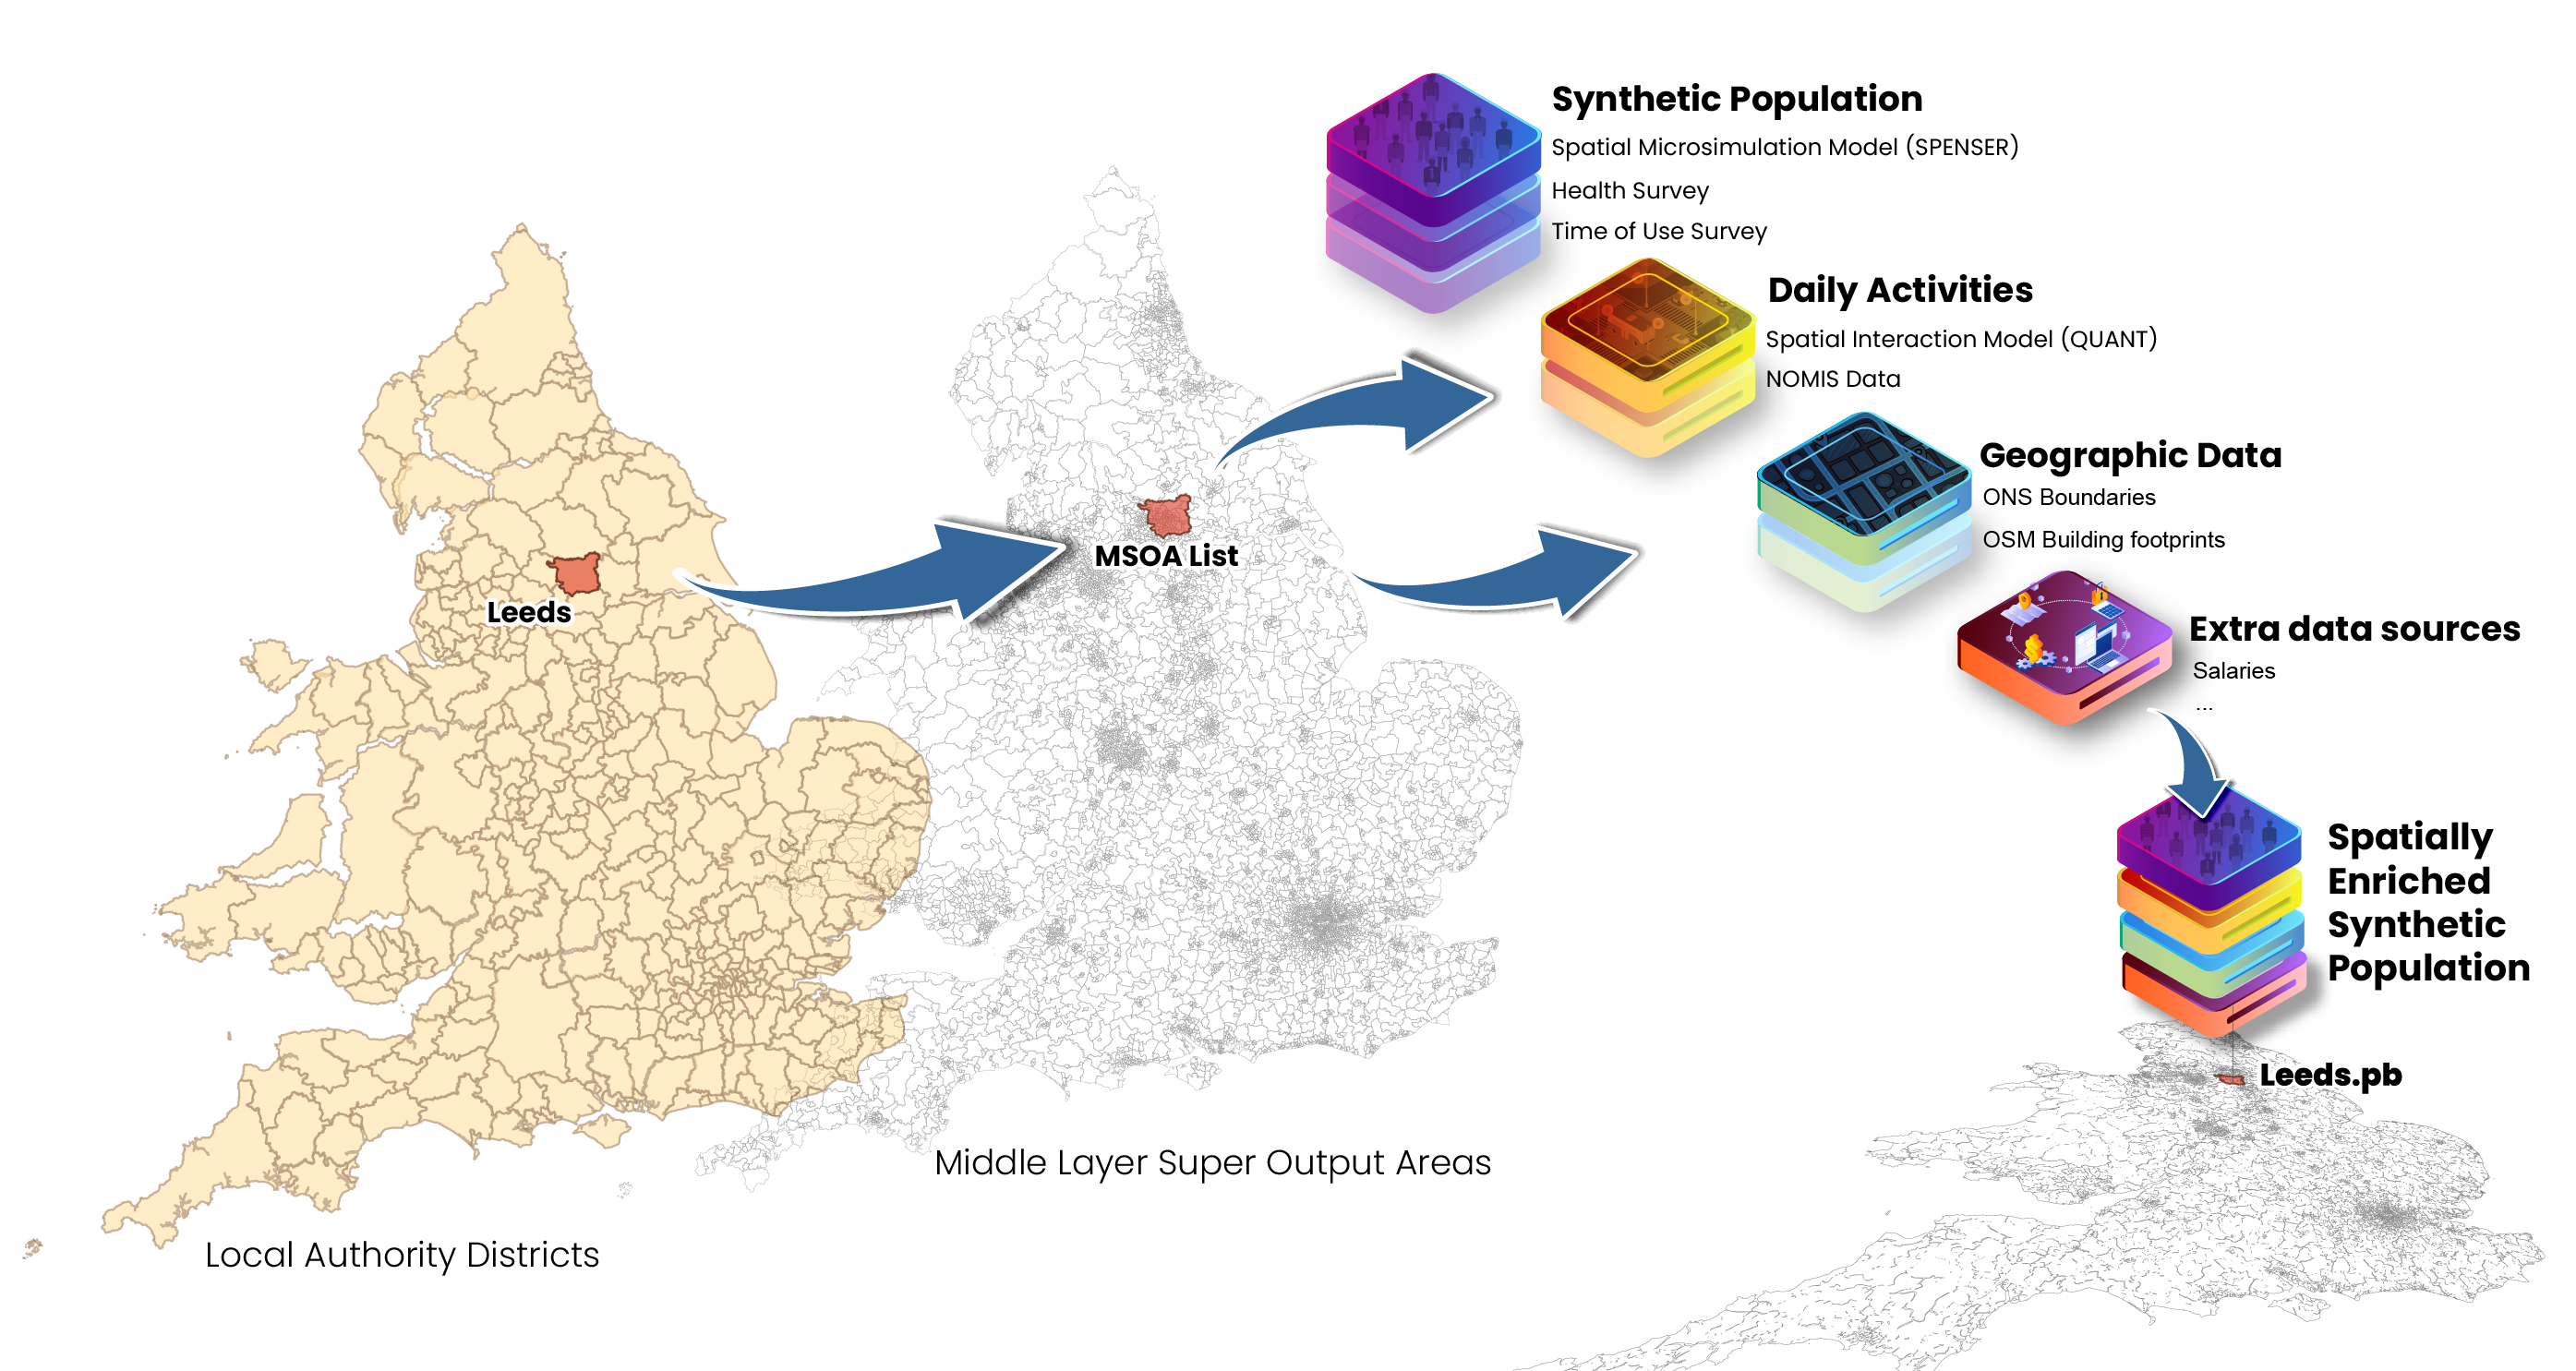

With this conext we will use a very simple example of the use of Iterative Proportial Fitting - IPF to simulated individuals in a fictional and very small world of 33 individuals, replicating what coulld the most resonable scenario where you migth need the spatial microsimulation model. 


The next part of the lab is based on the material included in Robin Lovelace's book: http://spatial-microsim-book.robinlovelace.net/ but adapted to Python.


# Introduction

To familiarize you with the concept of spatial microsimulation, we will use a very tiny sample of data so you can see what is under the hood in terms of how the pipeline of this algorithm works. 

The example is the SimpleWorld, an imaginary small world consisting of **33 persons split across 3 zones**, as illustrated in the figure below. We have two sources of information about these people:

1. Aggregate counts of persons by age and sex in each zone (from the SimpleWorld Census)
2. Survey microdata recording more detailed information (age, sex and income), for five of the world’s residents.

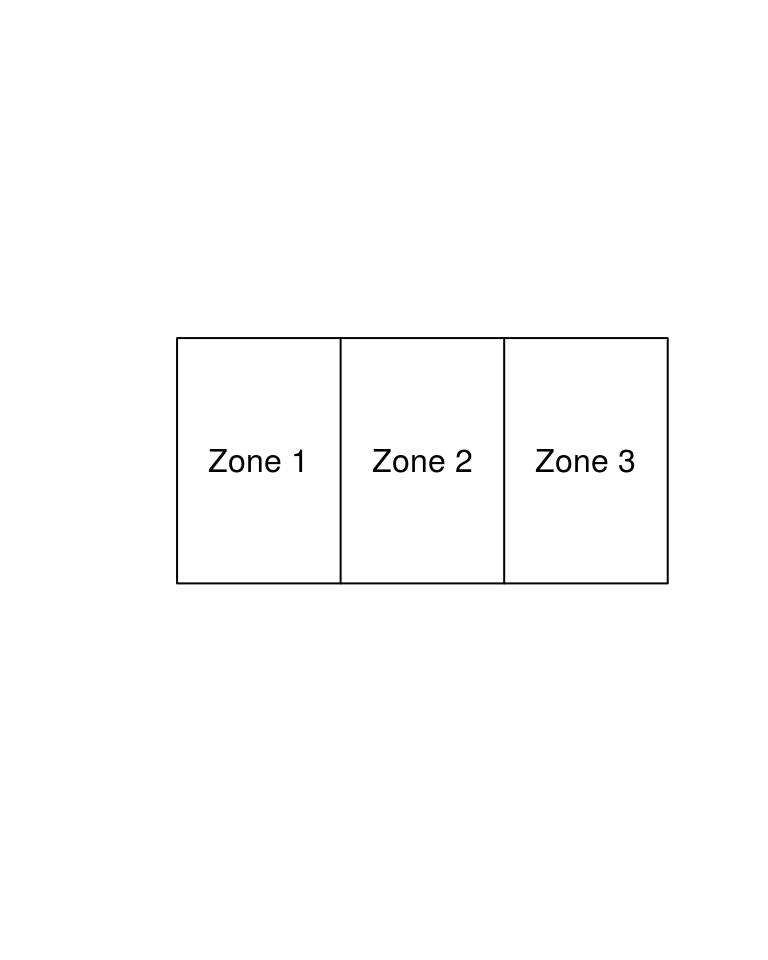

Unfortunately, the survey data lacks geographical information and includes only a small subset of the population (5 out of 33). To infer further information about SimpleWorld — and, more importantly, to be able to model its inhabitants — we need a methodology. This is precisely the kind of situation where spatial microsimulation is useful. 

SimpleWorld is inhabited by 12, 10, and 11 individuals in zones 1 to 3, respectively: a population of 33. From the SimpleWorld Census, we know how many young (strictly under 50 years old) and old (50 and over) residents live in each zone, as well as their genders: male and female.

# Data Preparation

As with most spatial microsimulation models, the input data in SimpleWorld consists of microdata — a non-geographical individual level dataset — and a constraint table which represents aggregate counts for a series of geographical zones. 

In some cases, you may have geographical information in your microdata, but not at the required level of detail. For example, you may have a variable on the province of each individual but need its municipality, a lower geographical level.

> Regardless of the research question it is clear that the methodology depends on the availability of data. If the problem relates to variables that are simply unavailable at any level (e.g. hair length, if your research question related to the hairdressing industry), spatial microsimulation may be unsuitable. If, on the other hand, all the data is available at the geographical level of interest, spatial microsimulation may not be necessary.
>
> >Spatial microsimulation is useful when you have an intermediary amount of data available: geographically aggregated count and a non-spatial survey.

Spatial microsimulation involves combining individual and aggregate level data. Each level should be given equal consideration when preparing the inputs for the modelling process. In many cases, the limiting factor for model fit will be the number of linking variables, variables shared between the individual and aggregate level datasets which are used to calculate the weights allocated to the individuals for each zone. These are also referred to as **constraint variables**, as they constrain the individual weights per zone (Ballas et al. 2005, Lovelace, R., Dumont, M., 2016. Spatial microsimulation with R)

When creating models that show how people live in different areas, it's important to use good and enough data. One important thing to consider is location data. Without it, we can't tell where people are living, which is crucial for building these models. 

Another important aspect to consider is the type of data we use to create these models. We need accurate data that represents a large percentage of the population in each area. If we use data that only represents a small percentage of the population, our models won't be very accurate.

For example, if we want to know how many people in a specific area aren't getting enough sleep, we can't just use data from a small survey. Instead, we need to use data from a large, reliable source like the Census. This will give us a better picture of what's going on in that area.

When analyzing data, we also need to be careful about which variables we choose to look at. This will depend on what we're trying to find out. For example, if we're interested in income inequality, we'll want to look at data on income levels, education, and employment. But if we're interested in energy use, we'll need to look at data on things like transportation and housing.

When we're looking at individual data, we need to make sure that it matches up with the location data we're using. For example, if we're using location data that's divided into five-year age groups, but the individual data only has age groups that are twenty years apart, that could be a problem.

The following are the most important considerations when it comes to selectecting the target and constraint variables:

* The geographical data should be the first consideration for making the model spatial.
* The constraint data should have close to 100% coverage of each zone's total population and should be integer counts. 
* Constraint variables should contain a sufficient number of categories
* Geographical datasets from the census are one of the best sources of data.
* The selection of individual level microdata should be based on linking variables and representativeness
* The sample size and diversity should be taken into account. 
* The selection of appropriate datasets is highly context-dependent.


In [2]:
# !pip install ipfn
# run this once.

In [3]:
import pandas as pd
import numpy as np
import copy

In [4]:
# Load the individual level data
ind = pd.read_csv('data/SimpleWorld/ind-full.csv')
ind

,id,age,sex,income
0,1,59,m,2868
1,2,54,m,2474
2,3,35,m,2231
3,4,73,f,3152
4,5,49,f,2473


Constraint data are usually made available one variable at a time, so these are read in one file at a time:

In [5]:
con_sex = pd.read_csv('data/SimpleWorld/sex.csv')
con_age = pd.read_csv('data/SimpleWorld/age.csv')

In [6]:
con_age

,a0.49,a.50+
0,8,4
1,2,8
2,7,4


In [7]:
con_sex

,m,f
0,6,6
1,4,6
2,3,8


This tells us that there 12, 10 and 11 individuals in zones 1, 2 and 3, respectively, with different proportions of young and old people. Zone 2, for example, is heavily dominated by older people: there are 8 people over 50 whilst there are only 2 young people (under 49) in the zone.

Even at this stage there is a potential for errors to be introduced. A classic mistake with areal (geographically aggregated) data is that the order in which zones are loaded can change from one table to the next. The constraint data should therefore come with some kind of zone id, an identifying code. This usually consists of a unique character string or integer that allows the order of different datasets to be verified and for data linkage using attribute joins. Moreover, keeping the code associated with each administrative zone will subsequently allow attribute data to be combined with polygon shapes and visualised using GIS software.

If we’re sure that the row numbers match between the age and sex tables (we are sure in this case), the next important test is to check the total populations of the constraint variables. Ideally both the total study area populations and row totals should match. If the row totals match, this is a very good sign that not only confirms that the zones are listed in the same order, but also that each variable is sampling from the same population base. 

In [8]:
# Check that the totals of the two constraints tables match
print ("con_age total:", con_age.values.sum(), "; con_sex total:", con_sex.values.sum())

# Check the row totals (i.e. area populations match)
print ("con_age row sums:", con_age.sum(axis=1).values, "; con_sex row sums:", con_sex.sum(axis=1).values)

# Test row sum equivalence
con_age.sum(axis=1) == con_sex.sum(axis=1)

con_age total: 33 ; con_sex total: 33
con_age row sums: [12 10 11] ; con_sex row sums: [12 10 11]


0    True
1    True
2    True
dtype: bool

## Subsetting to remove excess information


In the SimpleWorld dataset, only the `age` and `sex` variables are useful for reweighting: we can remove the others for the purposes of allocating individuals to zone. Note that it is important to keep track of individual Id’s, to ensure individuals do not get mixed-up by a function that changes their order. Before removing the income variable, we will create a backup of `ind` that can be referred back to if necessary.

In [9]:
# Store the full individidual dataset as ind_orig. 
# Use copy do make a 'deep' copy.
ind_orig = ind.copy()
# Drop the income field
ind = ind.drop(['income'],axis=1)
ind

,id,age,sex
0,1,59,m
1,2,54,m
2,3,35,m
3,4,73,f
4,5,49,f


## Re-categorising individual level variables

Before transforming the individual level dataset ind into a form that can be compared with the aggregate level constraints, we must ensure that each dataset contains the same information. It can be more challenging to re-categorise individual level variables than to re-name or combine aggregate level variables, so the former should usually be set first. An obvious difference between the individual and aggregate versions of the age variable is that the former is of type integer whereas the latter is composed of discrete bins: 0 to 49 and 50+.

In [10]:
# Now recategorise the age variable
ind['age'] = pd.to_numeric(ind['age'])

# overwrite the age variable with categorical age
ind['age'] = pd.cut(ind['age'], [0,49,120], labels = ['a0_49','a50+'])
ind

,id,age,sex
0,1,a50+,m
1,2,a50+,m
2,3,a0_49,m
3,4,a50+,f
4,5,a0_49,f


## Matching individual and aggregate level data names

Before combining the newly re-categorised individual level data with the aggregate constraints, it is useful for the category labels to match up. This may seem trivial, but will save time in the long run. Here is the problem:

In [11]:
ind.age

0     a50+
1     a50+
2    a0_49
3     a50+
4    a0_49
Name: age, dtype: category
Categories (2, object): ['a0_49' < 'a50+']

In [12]:
con_age.columns

Index(['a0.49', 'a.50+'], dtype='object')

Note that the names are subtly different. To solve this issue, we can simply change the names of the constraint variable, after verifying they are in the correct order:

In [13]:
# Rename the con_age fields to match the categories in the ind table
con_age = con_age.rename(columns={'a0.49':'a0_49','a.50+':'a50+'})
con_age

,a0_49,a50+
0,8,4
1,2,8
2,7,4


With both the age and sex constraint variable names now matching the category labels of the individual level data, we can proceed to create a single constraint object we label `cons`

## Matching individual and aggregate level data names


In [14]:
# Finally create a single constraint object by merging the constraints tables.
cons = con_age.merge(con_sex,left_index=True,right_index=True)
cons

,a0_49,a50+,m,f
0,8,4,6,6
1,2,8,4,6
2,7,4,3,8


## ‘Flattening’ the individual level data

We have made steps towards combining the individual and aggregate datasets and now only need to deal with 2 objects (`ind` and `cons`) which now share category and variable names. However, these datasets cannot possibly be compared because they measure very different things. The `ind` dataset records the value that each individual takes for a range of variables, whereas `cons` counts the number of individuals in different groups at the geographical level. These datasets are have different dimensions:

In [15]:
# Check the dimensions of the ind and cons datasets
print ("Shape of ind:",ind.shape)
print ("Shape of cons:",cons.shape)

Shape of ind: (5, 3)
Shape of cons: (3, 4)


We have one individual level dataset comprising 5 individuals with 3 variables (2 of which are constraint variables and the other an ID) and one aggregate level constraint table called `cons`, representing 3 zones with count data for 4 categories across 2 variables.

The dimensions of at least one of these objects must change before they can be correctly easily compared. To do this we ‘flatten’ the individual level dataset. This means increasing its width so each column becomes a category name. This allows the individual data to be matched to the geographical constraint data. 

In this new dataset (which we label `ind_cat`, short for ‘categorical’), each variable becomes a column containing Boolean numbers (either 1 or 0, representing whether the individual belongs to each category or not). Note that each row in `ind_cat` must contain a one for each constraint variable; the sum of every row in `ind_cat` should be equal to the number of constraints.

In [16]:
# we need to 'flatten' the individual dataset as the dimensions differ.
# This means that responses become fields, and values become booleans, with rows reflecting individuals
age_pivot = pd.pivot_table(ind,columns=['age'],values='id', index=ind.index, aggfunc=len, fill_value=0, observed=False )

# The last square bracket bit ensures that the column order is male then female.
sex_pivot = pd.pivot_table(ind,columns=['sex'],values='id', index=ind.index, aggfunc=len, fill_value=0, observed=False )[['m','f']]

In [17]:
age_pivot

age,a0_49,a50+
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


To undertake this ‘flattening’ process we will use the [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.htmml) function to expand each variable in turn. 

> Note that the order of columns is usually alphabetical: this can cause problems if the columns in the constraint tables are not ordered in this way. Knoblauch and Maloney (2012) provide a lengthier description of this flattening process.

In [20]:
# merge pivoted data to make flatten dataframe
ind_cat = pd.DataFrame(age_pivot.to_records()).merge(pd.DataFrame(sex_pivot.to_records()),left_index=True,right_index=True)
# drop intermediate columns
ind_cat = ind_cat.drop(['index_x','index_y'],axis=1)
ind_cat

,a0_49,a50+,m,f
0,0,1,1,0
1,0,1,1,0
2,1,0,1,0
3,0,1,0,1
4,1,0,0,1


To check that the code worked properly, let’s count the number of individuals represented in the new `ind_cat` variable, using sum:

In [22]:
# Check the columns sums to be sure ind_cat is correct
ind_cat.sum(axis=0)

# store these values
ind_agg = ind_cat.sum(axis=0)
ind_agg

# Now the survey data is in the same shape as the cons data in terms of how the columns are set up.

a0_49    2
a50+     3
m        3
f        2
dtype: int64

The sum of both age and sex variables is **5** (the total number of individuals): it worked! Looking at `ind_agg`, it is also clear that the object has the same ‘width’, or number of columns, `cons`. This means that the individual level data can now be compared with the aggregate level data.


In [23]:
test = pd.concat([cons.iloc[0], ind_agg], axis=1).transpose()
test

,a0_49,a50+,m,f
0,8,4,6,6
0,2,3,3,2


This shows us a direct comparison between the number of people in each category of the constraint variables in zone and in the individual level dataset overall. Clearly, this is a very small example with only 5 individuals in total existing in `ind_agg` (the total for each constraint) and 12 in zone 1. 

We can measure the size of this difference using measures of goodness of fit. A simple measure is `total absolute error (TAE)`, calculated in this case as `sum(abs(cons[1,] - ind_agg))`: the sum of the positive differences between cell values in the individual and aggregate level data.

> The purpose of the **reweighting** procedure in spatial microsimulation is to minimise this difference (as measured in TAE above) by adding high weights to the most representative individuals.

#  Population synthesis

Once the data is prepared and we run the required test, the next step is to generate the synthetic individuals. The focus now is on the **Iterative Proportional Fitting procedure (IPF)**, a simple, fast, and widely used method for allocating individuals to zones.

The degree to which each individual is representative of each zone is represented by their weight for that zone. Each weight links an individual to a zone. The number of weights is, therefore, equal to the number of zones multiplied by the number of individuals in the microdata.

Regarding the SimpleWorld data loaded earlier, `cons` zones and `ind` individuals (try validating these dataframes to confirm that there are 3 zones and 5 individuals in the input data for the SimpleWorld example). This means that `cons.len` * `ind.len` weights will be estimated (that is `3 ∗ 5 = 15` in SimpleWorld).

The weight matrix links individual level data to aggregate level data. A weight matrix value of `0` in cell `[i,j]`, for example, suggests that the individual `i` is not representative of zone `j`. During the IPF procedure these weights are iteratively updated until they converge towards a single result: the final weights which create a representative population for each zone.

> **Weighting algorithms**: A wide range of methods can allocate individuals to spatial microsimulation zones. As with the majority of procedures for statistical analysis, there are **deterministic** and **stochastic** methods. The results of deterministic methods, such as IPF, never vary: no random or probabilistic numbers are used, so the resulting weights will be the same every time. Stochastic methods such as simulated annealing, on the other hand, use some random numbers.

In the literature, the divide between stochastic and deterministic approaches is usually mapped onto a wider distinction between **reweighting and combinatorial optimisation methods**. Reweighting methods generally calculate non-integer weights for every individual-zone combination. Combinatorial optimisation methods generally work by randomly allocating individuals from the microdata survey into each zone, one-by-one, and re-calculating the goodness-of-fit after each change. If the fit between observed and simulated results improves after an individual has been ‘imported’ into the zone in question, the individual will stay. If the fit deteriorates, the individual will be removed from the zone, and the impact of switching a different individual into the zone will be tested.

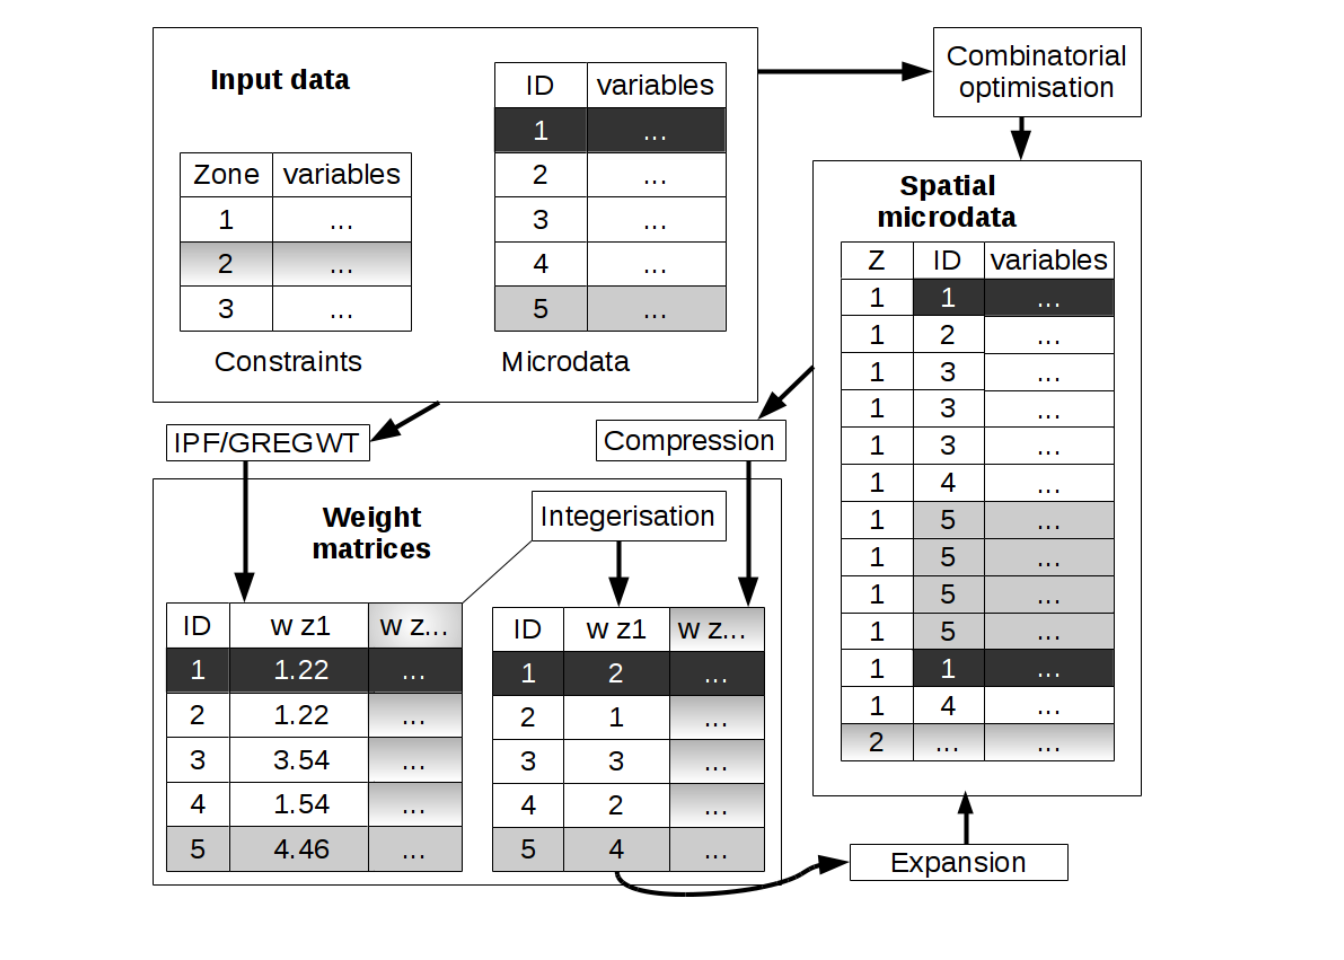

Caption: Schematic of different approaches for creating spatial microdata encapsulating stochastic combinatorial optimisation and deterministic reweighting algorithms such as IPF. Source: Lovelace, R., Dumont, M., 2016. Spatial microsimulation with R)

For more information about the concept of weights and why is it critical to understanding how population synthesis generates spatial microdata visit: https://spatial-microsim-book.robinlovelace.net/smsimr

# Iterative Proportional Fitting - IPF

The most widely used and mature deterministic method to allocate individuals to zones is iterative proportional fitting (IPF). IPF is mature, fast and has a long history: it was demonstrated by Deming and Stephan (1940) for estimating internal cells based on known marginals. IPF involves calculating a series of non-integer weights that represent how representative each individual is of each zone. **This is reweighting.**

It is not necessary to implement IPF from scratch, as we have Python packages that do that for us. 
The idea is you will generate a weight matrix representing how representative each individual is of each zone. 

The algorithm operates zone per zone, and the weight matrix will be filled in column per column. For convenience, we begin by assigning some of the basic parameters of the input data to intuitive names for future reference.



In [24]:
# This example will calculate the weights for zone 1.
# The process acts on the dataframe of individual observations.
# We'll make a copy of the individuals to preserve the originals.
ind_copy = ind.copy()
ind_copy

,id,age,sex
0,1,a50+,m
1,2,a50+,m
2,3,a0_49,m
3,4,a50+,f
4,5,a0_49,f


In [25]:
ind_copy['weight'] = np.ones(5)
ind_copy

,id,age,sex,weight
0,1,a50+,m,1.0
1,2,a50+,m,1.0
2,3,a0_49,m,1.0
3,4,a50+,f,1.0
4,5,a0_49,f,1.0


In [26]:
ind_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      5 non-null      int64   
 1   age     5 non-null      category
 2   sex     5 non-null      object  
 3   weight  5 non-null      float64 
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 381.0+ bytes


In [27]:
# Now, we must convert the age variable from the categorical data format  created by pd.cut() to string objects.
# The ipfn library can't handle categorical datatypes for some reason.
ind_copy['age'] = ind_copy['age'].astype(str)

ind_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5 non-null      int64  
 1   age     5 non-null      object 
 2   sex     5 non-null      object 
 3   weight  5 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes


In [28]:
# Now get the aggregates (marginals) and dimmension for zone 1 for age and sex.
# We need this structure to run the ipf method in python.

age = cons.iloc[0,[0,1]]
sex = cons.iloc[0,[2,3]]

aggregates = [age,sex]
dimensions = [['age'],['sex']]

print(aggregates)
print(dimensions)

[a0_49    8
a50+     4
Name: 0, dtype: int64, m    6
f    6
Name: 0, dtype: int64]
[['age'], ['sex']]


In [29]:
#Now, we can use the library to avoid implementing the algorithm from scratch.
# https://github.com/Dirguis/ipfn
from ipfn import ipfn
ipf = ipfn.ipfn(ind_copy,aggregates,dimensions,weight_col='weight',convergence_rate = 1e-15)
out = ipf.iteration()
out

ipfn converged: convergence_rate not updating or below rate_tolerance


,sex,age,id,weight
0,m,a50+,1,1.227998
1,m,a50+,2,1.227998
2,m,a0_49,3,3.544004
3,f,a50+,4,1.544004
4,f,a0_49,5,4.455996


This is only for the first Zone, now lets apply the same to the rest zones.

In [30]:
# Set up individuals
ind_copy_2 = ind.copy()
ind_copy_2['age'] = ind_copy_2['age'].astype(str)


# First, create some intuitive names for the totals
n_zones = len(cons) # number of zones


# Now, let's do this for each zone; maybe not the most efficient loop :)
for i in range(0,n_zones):
    # Make weights column for zone i
    ind_copy_2['weight_' + str(i)] = np.ones(5)
    
    # Now get the aggregates (marginals) for zone i for age and sex.
    age = cons.iloc[i,[0,1]]
    sex = cons.iloc[i,[2,3]]
    
    # Do iterative proportional fitting
    ipf = ipfn.ipfn(ind_copy_2, [age,sex],[['age'],['sex']],weight_col='weight_'+str(i),convergence_rate = 1e-15)
    ind_copy_2 = ipf.iteration()

ind_copy_2

ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance


,sex,age,id,weight_0,weight_1,weight_2
0,m,a50+,1,1.227998,1.725083,0.725083
1,m,a50+,2,1.227998,1.725083,0.725083
2,m,a0_49,3,3.544004,0.549834,1.549834
3,f,a50+,4,1.544004,4.549834,2.549834
4,f,a0_49,5,4.455996,1.450166,5.450166


In [58]:
# Check that the weights obtained make sense.
# Now create the marginal distribution of individuals in each zone.
ind_agg0 = cons.apply(lambda x: 1.0*ind_agg, axis=0).T[0:3].reset_index(drop=True)

ind_agg3 = (ind_agg0 * np.nan).copy()

for i in range(0,n_zones):
    ind_agg3.iloc[i] = ind_cat.apply(lambda x: x*ind_copy_2['weight_'+str(i)],axis=0).sum(axis=0)

ind_agg3

,a0_49,a50+,m,f
0,8.0,4.0,6.0,6.0
1,2.0,8.0,4.0,6.0
2,7.0,4.0,3.0,8.0


In [59]:
ind_agg

a0_49    2
a50+     3
m        3
f        2
dtype: int64

In [57]:
ind_agg0

,a0_49,a50+,m,f
0,2.0,3.0,3.0,2.0
1,2.0,3.0,3.0,2.0
2,2.0,3.0,3.0,2.0


Lets breakdown the previous validation code, essentially we are scaling each column of `cons` by the values in `ind_agg` (the columns sums in `ind_cat`), transposing the result, selecting the first three rows, and then resetting the index.

In [32]:
# Compare above with constraints - success!
cons

,a0_49,a50+,m,f
0,8,4,6,6
1,2,8,4,6
2,7,4,3,8


## Intergerisation

Integerisation is the process by which a vector of real numbers is converted into a vector of integers corresponding to the number of individuals present in synthetic spatial microdata. 

As you saw in the previous section the weights generated are fractional, making the results difficult to use as a final table of individuals, needed as input to agent-based models for example. Integerisation refers to methods for converting these fractional weights into integers, with a minimum loss of information (Lovelace and Ballas 2013). Simply rounding the weights is one integerisation method, but the results are very poor.

Two integerisation methods are describe in this section. Just to give you an idea how important Intergerisation is. The first treats weights as simple probabilities. The second constrains the maximum and minimum integer weight that can result from the integer just above and just under each fractional weight, and is known as TRS: ‘Truncate Replicate Sample’.

The distinction between reweighting of fractional weights and combinatorial optimisation algorithms is important: combinatorial optimisation methods result in whole individuals being allocated to each zone whereas reweighting strategies result in fractions of individuals being allocated to each zone. The latter method means that individual `i` could have a weight of 0.223 (or any other positive real number) for zone `j` . Of course, this sounds irrational: a quarter of a person cannot possibly exist: either she is in the zone or she is not!

In [ ]:
# The weights generated are fractional, to allcoate individuals to zones 
# we need to convert these to integers. Ideally, with a minimum loss of information.

# We'll start with a function for a method called 'proportional probabilities'.
def int_pp(weights):
    # convert to a vector if required
    xv = np.array(weights).ravel()
    # Sample the individuals
    rsum = round(xv.sum())
    xs = np.random.choice(len(xv),int(rsum),True,xv/xv.sum())
    # return the result
    return np.bincount(xs,minlength=len(xv))



In [ ]:
# Run the function five times for two set of values
np.random.seed(24)
values = [[0.333, 0.667, 3], [1.333, 1.333, 1.333]]

for i, v in enumerate(values, 1):
    print(f"Results for set {i}:")
    for j in range(5):
        result = int_pp(v)
        print(f"Iteration {j+1}: {result}")
    print()

Here we can see the problem of this initial method, note that given the random nature of proportional probabilities, you get different values of integers with every repetition. You could easly define a `seed` parameter to restrict the ramdonness of the results (try to uncommment that line, but still you get different results). However the main issue is that unrepresentative arrangements have a non-zero chance of occurance. This is the reason  Lovelace and Ballas (2013) suggest the truncate, replicate, sample TRS method.

In [63]:
# Lovelace and Ballas (2013) suggest a truncate, replicate, sample 'TRS' approach to deal with this.
# In effect this means that any individual with weight > 1 is sampled at least once.

def int_trs(weights):
    # convert to a vector if required
    xv = np.array(weights).ravel()
    # truncate - just get the integer part of the weight
    xint = np.floor(xv)
    # Get the decimal bit of the weight
    r = xv - xint
    # Work out the deficit population
    frac_sum = round(r.sum())
    # Sample based upon the deficit bit
    xs = np.random.choice(len(xv),int(frac_sum),True,r/r.sum())
    # Get the result of the deficit part
    topup = np.bincount(xs,minlength=len(xv))
    return xint + topup

In [64]:
# Test this function
np.random.seed(24) # This seed reproduces the answer.
values = [[0.333, 0.667, 3], [1.333, 1.333, 1.333]]

for i, v in enumerate(values, 1):
    print(f"Results for set {i}:")
    for j in range(5):
        result = int_trs(v)
        print(f"Iteration {j+1}: {result}")
    print()

Results for set 1:
Iteration 1: [0. 1. 3.]
Iteration 2: [0. 1. 3.]
Iteration 3: [0. 1. 3.]
Iteration 4: [1. 0. 3.]
Iteration 5: [0. 1. 3.]

Results for set 2:
Iteration 1: [1. 1. 2.]
Iteration 2: [1. 1. 2.]
Iteration 3: [2. 1. 1.]
Iteration 4: [2. 1. 1.]
Iteration 5: [1. 2. 1.]



In [65]:
# Now use the TRS approach to integerisation to generate some microdata for SimpleWorld
# First, get integer weights for area 1
int_weight1 = int_trs(ind_copy_2['weight_0'])
int_weight1

array([1., 1., 5., 1., 4.])

## Expansion

The remaining step to create the spatial microdata is expansion. Each integerised weight corresponds to the number of needed repetitions for each individual.

In [66]:
# Integerised weights correspond to the number of repetitions of a given individual.
# Firstly, expand the weights
def int_expand_vector(weights):
    return np.repeat(range(0,len(weights)),weights.astype(int))

print (int_weight1)
print (int_expand_vector(int_weight1))

[1. 1. 5. 1. 4.]
[0 1 2 2 2 2 2 3 4 4 4 4]


In [67]:
# expand the indices for zone 1
exp_indices = int_expand_vector(int_weight1)
# Generate the microdata from the individuals table
ind_orig.iloc[exp_indices]

,id,age,sex,income
0,1,59,m,2868
1,2,54,m,2474
2,3,35,m,2231
2,3,35,m,2231
2,3,35,m,2231
2,3,35,m,2231
2,3,35,m,2231
3,4,73,f,3152
4,5,49,f,2473
4,5,49,f,2473


## Putting integeristation and expansion together.

In [68]:
# Now let's put the integeristation and expansion together for all areas

indivs = []
for i in range(0, n_zones):
    # Integerise and expand
    ints = int_expand_vector(int_trs(ind_copy_2['weight_' + str(i)]))
    # Select the relevant individuals using .loc
    temp = ind_orig.loc[ints].copy()
    # Assign the 'zone' column
    temp['zone'] = i
    indivs.append(temp)

ints_df = pd.concat(indivs)
#Resetting the index of the resulting table.
ints_df.reset_index(drop=True, inplace=True)
ints_df

,id,age,sex,income,zone
0,1,59,m,2868,0
1,2,54,m,2474,0
2,3,35,m,2231,0
3,3,35,m,2231,0
4,3,35,m,2231,0
5,4,73,f,3152,0
6,4,73,f,3152,0
7,5,49,f,2473,0
8,5,49,f,2473,0
9,5,49,f,2473,0


What you jave created is the 33 syntetic individuals, included in you census data (`cons_age`, `cons_sex`) based on the survey or individual data `ind`. Something it was restricted by the aggregated counts, now you can handle at the most granular level, individual per individual, but even more located to all the zones, that also corresponde with the total per zone from your SimpleWorld Census. Cool! ah!

In the next lab you will learn how to apply the same process in another fictional scenario, but creating syntetcih indidual for an area larger than this 33 individuals world. The scenario is fictional but it will be closer to what you will find when dealing with census data and tradional surveys. 

# Finishing the Lab

Please ensure that you save all your code and upload the latest version of this notebook to your **GitHub repository**. 

> Always check the size of your notebook before making any commit; use the `.gitignore` to skip big data sets or undesired files. Describe where to find the data and the correct structure so that when the marker fork, your code can reproduce your results. 
